In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
import numpy as np
from sklearn.tree import plot_tree

##Bagging

####Bagging clasificacion

In [ ]:
titanic = pd.read_csv("titanic.csv")

In [ ]:
titanic.shape

(891, 12)

In [ ]:
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [ ]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Elimina columna Cabin:

In [ ]:
titanic.drop("Cabin",axis=1,inplace=True)

Imputa valores faltantes en Age en función del sexo:

In [ ]:
median_male = titanic[titanic.Sex == "male"]["Age"].median()
median_female = titanic[titanic.Sex == "female"]["Age"].median()

In [ ]:
titanic.loc[(titanic.Sex == "male") & (titanic.Age.isna()), "Age"] = median_male
titanic.loc[(titanic.Sex == "female") & (titanic.Age.isna()),"Age"] = median_female

Imputa valores faltantes en Embarked:

In [ ]:
titanic.Embarked.fillna(titanic.Embarked.value_counts().idxmax(), inplace = True)

In [ ]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Análisis exploratorio:

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


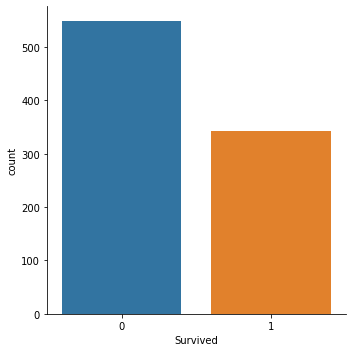

In [ ]:
sns.factorplot(x="Survived",kind="count",data=titanic)

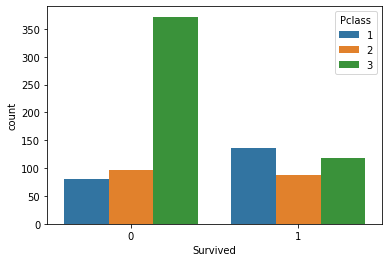

In [ ]:
sns.countplot(x="Survived",hue="Pclass",data=titanic)

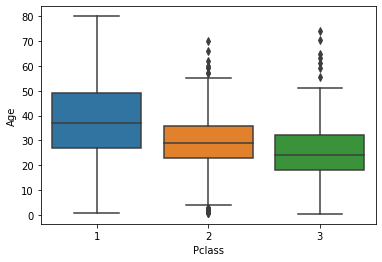

In [ ]:
sns.boxplot(x='Pclass',y='Age',data=titanic)

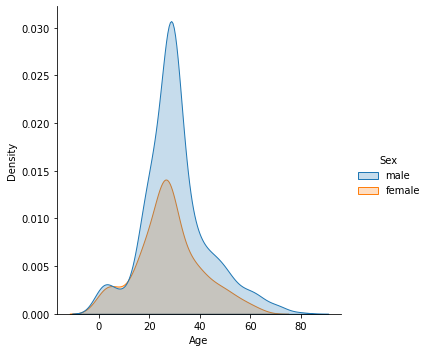

In [ ]:
sns.displot(kind='kde', data=titanic,
            x='Age',
            hue='Sex',
            fill = "True")

Selección de variables:

In [ ]:
titanic_filter = titanic[["Survived", "Pclass", "Sex",
                          "Age",	"SibSp",	"Parch",
                          "Fare",	"Embarked"]]

Transformacion de variables:

In [ ]:
titanic_filter = pd.get_dummies(
    titanic_filter).drop(
        columns = ["Sex_male", "Embarked_S"])

Division en entrenamiento y test:

In [ ]:
X = titanic_filter.drop("Survived", axis = 1)
y = titanic_filter["Survived"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

Escalado de los datos:

In [ ]:
std = StandardScaler()
x_train_std = std.fit_transform(X_train)
x_test_std = std.transform(X_test)

Definición del modelo Bagging:

In [ ]:
estimador = LogisticRegression()

In [ ]:
baggModel = BaggingClassifier(
    base_estimator = estimador, n_estimators=10)
#nota: en las nuevas versiones de sklearn base_estimator es estimator

In [ ]:
baggModel.fit(x_train_std, y_train)
pred_train = baggModel.predict(x_train_std)
pred_test = baggModel.predict(x_test_std)

Cálculo de las métricas:

In [ ]:
#Train
confusion_matrix(pred_train, y_train)

array([[392,  76],
       [ 56, 188]])

In [ ]:
#Train acc
accuracy_score(pred_train, y_train)

0.8146067415730337

In [ ]:
#Test
confusion_matrix(pred_test, y_test)

array([[78, 22],
       [23, 56]])

In [ ]:
#Test acc
accuracy_score(pred_test, y_test)

0.7486033519553073

**[EJERCICIO] Prueba ahora a emplear distinto número y tipos de estimadores. Selecciona el mejor modelo:**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
estimador = KNeighborsClassifier(n_neighbors=10)

In [ ]:
baggModel = BaggingClassifier(base_estimator = estimador, n_estimators=20)
#nota: en las nuevas versiones de sklearn base_estimator es estimator

In [ ]:
baggModel.fit(x_train_std, y_train)
pred_train = baggModel.predict(x_train_std)
pred_test = baggModel.predict(x_test_std)

In [ ]:
#Train confusion_matrix
confusion_matrix(pred_train, y_train)

array([[410,  65],
       [ 38, 199]])

In [ ]:
#Train accuracy
accuracy_score(pred_train, y_train)

0.8553370786516854

In [ ]:
#Test confusion_matrix
confusion_matrix(pred_test, y_test)

array([[87, 25],
       [14, 53]])

In [ ]:
#Test accuracy
accuracy_score(pred_test, y_test)

0.7821229050279329

####Bagging regresion

##Random forest

####Random forest regresion

In [ ]:
salary = pd.read_csv("Salary_Data.csv")

In [ ]:
salary.head()

YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

In [ ]:
X = salary.iloc[:, :-1].values
y = salary.iloc[:, 1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 0)

In [ ]:
rf_regressor = RandomForestRegressor()

In [ ]:
rf_regressor.fit(X_train, y_train)
pred_train = rf_regressor.predict(X_train)
pred_test = rf_regressor.predict(X_test)

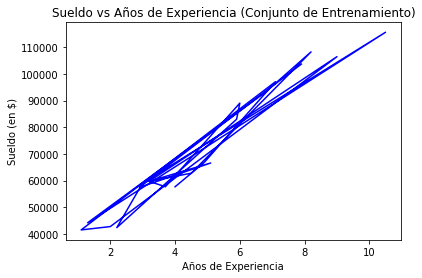

In [ ]:
#plt.scatter(np.ndarray.flatten(X_train), y_train, color = "red")
plt.plot(np.ndarray.flatten(X_train), pred_train, color = "blue")
plt.title("Sueldo vs Años de Experiencia (Conjunto de Entrenamiento)")
plt.xlabel("Años de Experiencia")
plt.ylabel("Sueldo (en $)")
plt.show()

**[EJERCICIO] Comparación la gráfica anterior con la gráfica de un modelo de regresión lineal (LinearRegression):**

In [ ]:
# Generamos el modelo de regresión lineal
regression = LinearRegression()
# Le pasamos el conjunto de train
regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred_train = regression.predict(X_train)
pred_test = regression.predict(X_test)

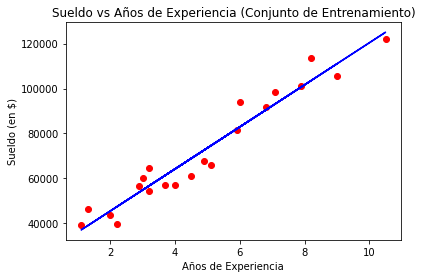

In [ ]:
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, pred_train, color = "blue")
plt.title("Sueldo vs Años de Experiencia (Conjunto de Entrenamiento)")
plt.xlabel("Años de Experiencia")
plt.ylabel("Sueldo (en $)")
plt.show()

**[EJERCICIO: RANDOM FOREST MULTIVARIANTE] Predice el beneficio de las siguientes startups dadas las variables R&D Spend, gastos administrativos, gastos de marketing y estado. Divide el conjunto en 80% train y 20% test.**

**Prueba a seleccionar distintos hiperparámetros del modelo y calcular las métrica de calidad mean_absolute_error**

**Visualiza el estimador 0 del RandomForest a través de la función plot_tree**

In [ ]:
startups = pd.read_csv("50_Startups.csv")
startups.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

Genera dummies para variables categóricas:

In [ ]:
startups_dummies = pd.get_dummies(startups)

Separa en X e Y:

In [ ]:
X = startups_dummies.drop(columns = "Profit", axis = 1)
y = startups_dummies["Profit"]

Divide en train y test:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 123)

Define el modelo de randomForest con los estimadores:

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=5)

Entrena el modelo de randomForest:

In [ ]:
rf_regressor.fit(X_train, y_train)
pred_train = rf_regressor.predict(X_train)
pred_test = rf_regressor.predict(X_test)

Visualiza el modelo randomForest para el primer estimador:

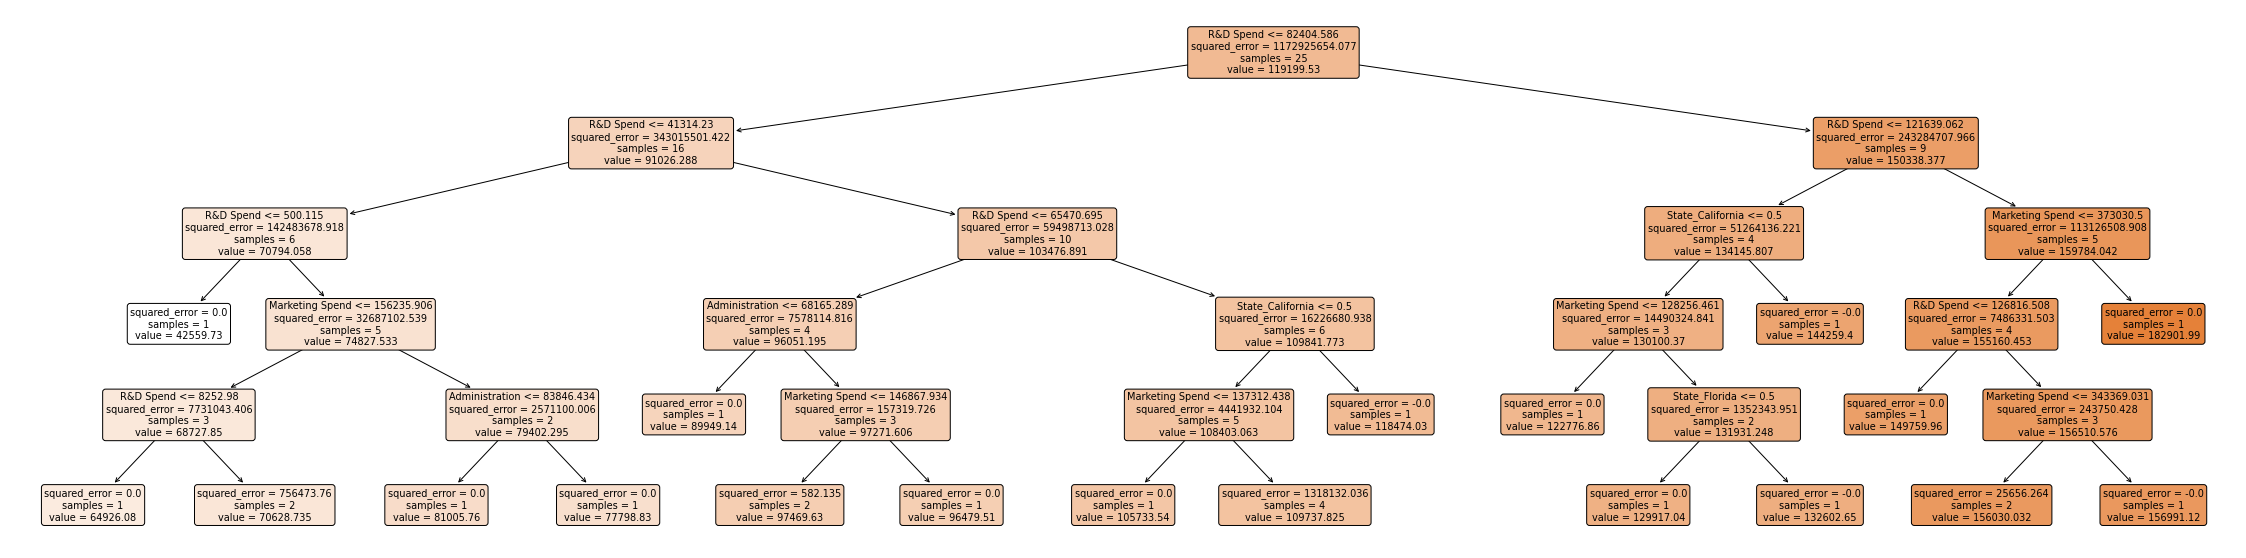

In [ ]:
fig = plt.figure(figsize=(40, 10))
plot_tree(rf_regressor.estimators_[0],
          feature_names=X_train.columns,
          filled=True, impurity=True,
          rounded=True);

Calcula la métrica de regresión MAE en train:

In [ ]:
mean_absolute_error(pred_train, y_train)

3615.307362541103

Calcula la métrica de regresión MAE en test:

In [ ]:
mean_absolute_error(pred_test, y_test)

7466.4410310865815

####Random forest clasificacion

¿Les darán préstamos a los clientes de un banco en base a una serie de variables?

Importa datos:

In [ ]:
prestamo = pd.read_csv(r"prestamo.csv")
prestamo.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

Analiza balanceo de clases.

In [ ]:
prestamo['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Transformación de las variables:

In [ ]:
prestamo["Gender"] = prestamo["Gender"].map({"Male" : 1 , "Female" : 0})
prestamo['Married'] = prestamo['Married'].map({"Yes" : 1 , "No" : 0})
prestamo['Education'] = prestamo['Education'].map({'Graduate': 1 , 'Not Graduate' : 0})
prestamo['Dependents'].replace('3+' ,3 , inplace=True)
prestamo['Self_Employed'] = prestamo['Self_Employed'].map({'Yes': 1 , 'No': 0})
prestamo['Property_Area'] = prestamo['Property_Area'].map({'Semiurban' : 1 , 'Urban': 2 , 'Rural': 3})
prestamo['Loan_Status'] = prestamo['Loan_Status'].map({'Y' : 1 , 'N' : 0})

Tratamiento de valores faltantes:

In [ ]:
prestamo.isna().sum()/len(prestamo)

Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

Elimina NA de las siguientes variables sustituyendo por distintos estadísticos:

In [ ]:
rev_null=['Gender','Married','Dependents','Self_Employed',
          'Credit_History','LoanAmount','Loan_Amount_Term']
prestamo[rev_null]=prestamo[
    rev_null].replace({
        np.nan:prestamo['Gender'].mode(),
        np.nan:prestamo['Married'].mode(),
        np.nan:prestamo['Dependents'].mode(),
        np.nan:prestamo['Self_Employed'].mode(),
        np.nan:prestamo['Credit_History'].mode(),
        np.nan:prestamo['LoanAmount'].median(),
        np.nan:prestamo['Loan_Amount_Term'].median()})

In [ ]:
prestamo.isna().sum()/len(prestamo)

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

División en entrenamiento y test:

In [ ]:
X = prestamo.drop(columns=['Loan_ID','Loan_Status'])
y = prestamo['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 0)

Escalado de los datos:

In [ ]:
sta = StandardScaler()
X_train = sta.fit_transform(X_train)
X_test = sta.transform(X_test)

Entrenamiento del modelo:

In [ ]:
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

Predicción del modelo:

In [ ]:
#Predicción en train:
y_pred_train = rfc.predict(X_train)
#Prediccion en test:
y_pred_test = rfc.predict(X_test)

Métricas del modelo:

In [ ]:
#Train
print(f"ACC: {accuracy_score(y_pred_train, y_train)}")
print(confusion_matrix(y_pred_train, y_train))

ACC: 1.0
[[141   0]
 [  0 288]]


In [ ]:
#Test
print(f"ACC: {accuracy_score(y_pred_test, y_test)}2")
print(confusion_matrix(y_pred_test, y_test))

ACC: 0.76756756756756762
[[ 22  14]
 [ 29 120]]


#####**[EJERCICIO] Visualiza la curva ACC para entrenamiento y test desde 1 estimador hasta 80 estimadores.**

In [ ]:
lista_acc_train = []
lista_acc_test = []
for n_estima in range(1,80):
  rf = RandomForestClassifier(criterion = 'entropy', n_estimators = n_estima)
  #nota: en las nuevas versiones de sklearn base_estimator es estimator
  rf.fit(X_train, y_train)

  predict_train = rf.predict(X_train)
  predict_test = rf.predict(X_test)

  lista_acc_train.append(accuracy_score(predict_train, y_train))
  lista_acc_test.append(accuracy_score(predict_test, y_test))

Visualiza la curva ACC:

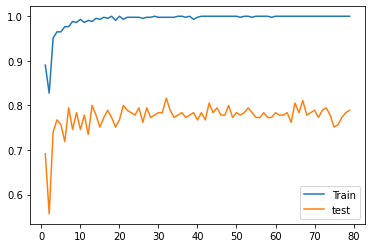

In [ ]:
plt.plot(range(1,80), lista_acc_train, label = "Train")
plt.plot(range(1,80), lista_acc_test, label = "test")
plt.legend()
plt.show()


####RandomForest como modelo de selección de variebles:

In [ ]:
rf.feature_importances_

array([0.02569312, 0.02393888, 0.06737377, 0.02444639, 0.03040618,
       0.19431785, 0.12077017, 0.20808736, 0.03587332, 0.21889986,
       0.0501931 ])

<BarContainer object of 11 artists>

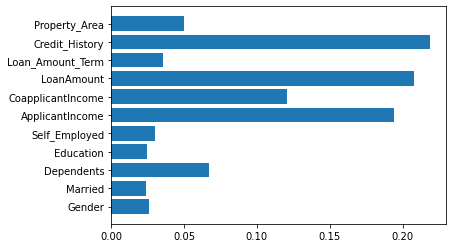

In [ ]:
plt.barh(X.columns, rf.feature_importances_)